In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn import svm

* **pandas** *(Python for Data Analysis) berfungsi memanipulasi dan membaca data dalam format .csv .xlsx .sql
* **numpy** *(Numerical Python) berfungsi membentuk objek N-dimensional array, yang mirip dengan list pada Python
* **seaborn** *berfungsi untuk mempermudah analis data untuk memproduksi visualisasi yang baik tanpa harus kostumisasi seperti pada matplotlib.
* **Sklearn** * berfungsi untuk membantu melakukan processing data ataupun melakukan training data dari module sklearn tersebut di import library svm

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

mengimport module dari Slearn
*Dari module sklearn.model_selection mengimport train_test_split yang berfungsi untuk membagi train dan test dari x dan y*
*Dari Module sklearn.ensemble mengimport RandomForestClassifier*
*load Module sklearn.feature_selection mengimport RFECV*
*load sklearn.model_selection mengimport GridSearchCV*
*load sklearn.tree mengimport DecisionTreeClassifier*
*load sklearn.preprocessing mengimport LabelEncoder*
*load sklearn.preprocessing mengimport StandardScaler*
*load sklearn.metrics mengimport confusion_matrix*
*load sklearn.metrics megimport classification_report*
*load sklearn.metrics mengimport roc_auc_score*
*sklearn.metrics mengimport roc_curve*

In [4]:
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier

**mengimport sklearn.metrics yang berfungsi menampilkan serangkaian fungsi sederhana yang mengukur kesalahan prediksi berdasarkan kebenaran dan prediksi dasar**
**mengimport matplotlib library yang berfungsi sebagai plotting 2-dimensi yang bisa digunakan dalam script python dan ipython.**
**Dari module sklearn.metrics mengimport precision_recall_fscore_support berfungsi membuat laporan teks yang menampilkan metrik klasifikasi utama.**
**Dari Module sklearn.linear_model mengimport SGDClassifier berfungsi untuk Pengklasifikasi linier (SVM, regresi logistik, dll.) Dengan pelatihan SGD.**

In [7]:
data = pd.read_csv('Data/data.csv')
print('Dimension of the dataset : ', data.shape)
print(data.head())

Dimension of the dataset :  (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  p

mengimport data menggunakan library pandas*
dan selanjutnya menampilkan data akan tetapi tidak seluruh data meainkan data-head nya saja*

In [8]:
del data['Unnamed: 32']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

tahap ini adalah menghapus data yang tidak bernama

In [9]:
X = data.iloc[:, 2:].values
Y = data.iloc[:, 1].values
print(type(Y))
print("\n Actual Class Labels : ", Y)

<class 'numpy.ndarray'>

 Actual Class Labels :  ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 '

Memisahkan variabel fitur dan variabel kelas (variabel target)

In [10]:
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print('After Encoding : ', Y)

After Encoding :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 

tahap ini adalah pengkodean label kelas M & B ke 1 & 0

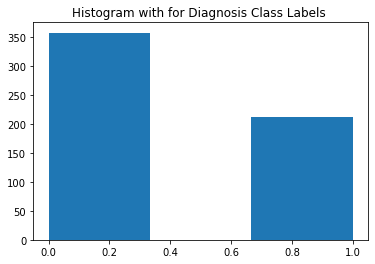

In [11]:
plt.hist(Y, bins=3)
plt.title("Histogram with for Diagnosis Class Labels ")
plt.show()

tahap ini adalah menampilkan data histogram dengan menggunakan library matplotlib

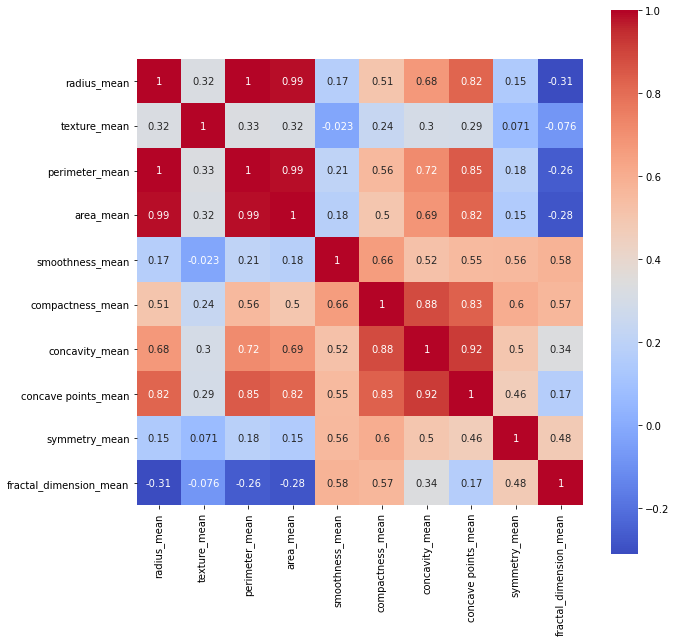

In [12]:
mean_columns = list(data.columns[2:12])
mean_columns
plt.figure(figsize=(10, 10))
sns.heatmap(data[mean_columns].corr(), annot = True, square = True, cmap ='coolwarm' )
plt.savefig('correlation')
plt.show()

pada tahap ini adalah menampilkan data korelasi dengan mencari rata rata kolom dengan nilai 2:12

In [13]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3, random_state= 0)
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)

Memisahkan data menjadi set pengujian dan pelatihan dan memilih secara acak agar bias(terkadang mereka adalah data yang sangat berkorelasi)
melakuka penskalakan data pelatihan(penskalaan fitur)
Setiap fitur dalam dataset ini sekarang akan memiliki mean/rata-rata = 0 dan deviasi standar = 1

pada tahap ini menggunkaan 3 model building
1. Stochastic Gradient Descent (SGD)
2. Support Vector Machines (SVM- Linear Kernel)
3. Support Vector Machines (SVM- Gaussian Kernel)


TP 60 FP 7 FN 3 TN 101
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171

Accuracy of Stochastic Gradient classifier on test set: 94.15

[[101   7]
 [  3  60]]
Time took for training and predicting the results 0.18654 in seconds

Recall  0.9523809523809523
F1- Score   0.923076923076923


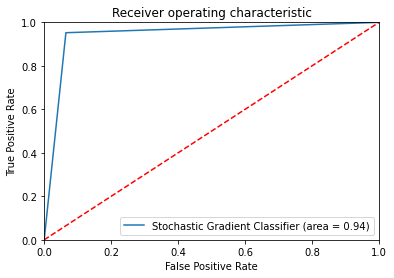

Area Under the Curve  0.9437830687830688


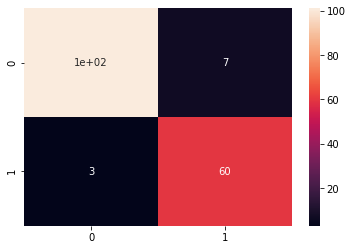

In [14]:
def StochasticGradient(train, label, test, label_test):
    
    start = time.time()
    
    model = SGDClassifier()
    model.fit(train, label)
    
    pred = model.predict(test) 
    
    
    end = time.time()
    
    confusion_mat = confusion_matrix(label_test, pred)
    def get_confusion_matrix_values2(label_test, pred):
        cm = confusion_matrix(label_test,  pred)
        return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred))
    
    print('Accuracy of Stochastic Gradient classifier on test set: {:.2f}\n'.format(float(confusion_mat[0,0]+confusion_mat[1,1])*100/confusion_mat.sum()))
    print(confusion_mat)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall = float(confusion_mat[1, 1]/(confusion_mat[1,1]+confusion_mat[1,0]))
    prec  = float(confusion_mat[1, 1]/(confusion_mat[1,1]+confusion_mat[0,1]))

    f_score = (2*recall*prec)/(recall + prec)


    print('Recall ', recall)

    print('F1- Score  ', f_score)

    roc_auc4 = roc_auc_score(label_test, pred)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Stochastic Gradient Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    print('Area Under the Curve ', roc_auc4)
    sns.heatmap(confusion_mat, annot=True)
    plt.savefig('SGD.png')
    plt.show()

StochasticGradient(X_train1, Y_train1, X_test1, Y_test1)

*Formula : *
*Akurasi = (TP + TN ) / (TP+FP+FN+TN)
*Precission = (TP) / (TP+FP)
*Specificity = (TN)/ (TN + FP)
*F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
*pada building StochasticGradient dimana data akan dilakukan pengoptimalan yang dilakukan dari nilai awal,dengan data yang dipilih secara acak dari sekumpulan data untuk setiap iterasi

TP 62 FP 5 FN 1 TN 103
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.93      0.98      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy of Support vector Machines classifier on test set: 96.49

[[103   5]
 [  1  62]]
Time took for training and predicting the results 0.024005 in seconds

Recall  0.9841269841269841
F1- Score   0.9538461538461538


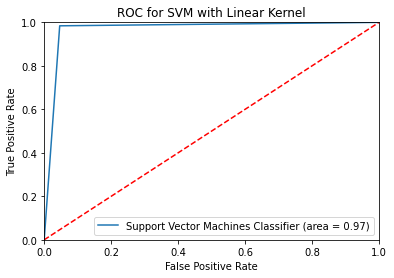

Area Under the Curve  0.968915343915344


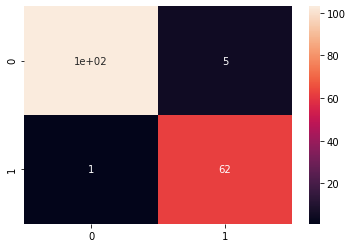

In [15]:
def SupportVectorMachines(train, label, test, label_test):
    start = time.time()
    
    model1 = svm.SVC(kernel = 'linear', C = 0.3)
    model1.fit(train, label)
    
    pred1 = model1.predict(test) 
    
    
    end = time.time()
    
    confusion_mat1 = confusion_matrix(label_test, pred1)
    def get_confusion_matrix_values2(label_test, pred1):
        cm1 = confusion_matrix(label_test,  pred1)
        return(cm1[0][0], cm1[0][1], cm1[1][0], cm1[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred1)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred1))
    
    print('Accuracy of Support vector Machines classifier on test set: {:.2f}\n'.format(float(confusion_mat1[0,0]+confusion_mat1[1,1])*100/confusion_mat1.sum()))
    print(confusion_mat1)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall1 = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[1,0]))
    prec1  = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[0,1]))

    f_score1 = (2*recall1*prec1)/(recall1 + prec1)

    # print('real prec', prec)


    print('Recall ', recall1)

    print('F1- Score  ', f_score1)

    roc_auc4 = roc_auc_score(label_test, pred1)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred1)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Support Vector Machines Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for SVM with Linear Kernel')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC_SVM')
    plt.show()

    print('Area Under the Curve ', roc_auc4)
    sns.heatmap(confusion_mat1, annot=True)
    plt.savefig('SVM.png')
    plt.show()


SupportVectorMachines(X_train1, Y_train1, X_test1, Y_test1)


Formula :
Akurasi = (TP + TN ) / (TP+FP+FN+TN)
Precission = (TP) / (TP+FP)
Specificity = (TN)/ (TN + FP)
F1 Score = 2 * (Recall*Precission) / (Recall + Precission)
svm linear digunakan untuk menyelesaikan masalah klasifikasi dan
regresi adalah model linear, yaitu model yang merupakan kombinasi linear
dari fungsi basis.

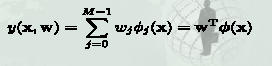

In [17]:
from IPython.display import Image
Image("Image/formula2.png")

pada gambar diatas adalah rumus dari svm-linear

TP 59 FP 0 FN 4 TN 108
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy of Support vector Machines classifier on test set: 97.66

[[108   0]
 [  4  59]]
Time took for training and predicting the results 0.010004 in seconds

Recall  0.9365079365079365
F1- Score   0.9672131147540983


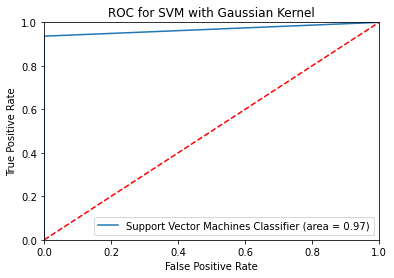

Area Under the Curve for Gaussian Kernel  0.9682539682539683


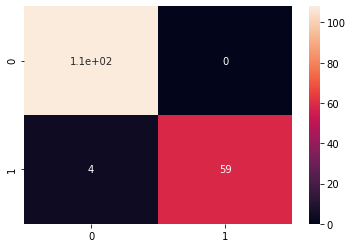

In [16]:
def SupportVectorMachines1(train, label, test, label_test):
    start = time.time()
    
    model1 = svm.SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02)
    model1.fit(train, label)
    
    pred1 = model1.predict(test) 
    
    
    end = time.time()
    
    confusion_mat1 = confusion_matrix(label_test, pred1)
    def get_confusion_matrix_values2(label_test, pred1):
        cm1 = confusion_matrix(label_test,  pred1)
        return(cm1[0][0], cm1[0][1], cm1[1][0], cm1[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred1)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred1))
    
    print('Accuracy of Support vector Machines classifier on test set: {:.2f}\n'.format(float(confusion_mat1[0,0]+confusion_mat1[1,1])*100/confusion_mat1.sum()))
    print(confusion_mat1)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall1 = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[1,0]))
    prec1  = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[0,1]))

    f_score1 = (2*recall1*prec1)/(recall1 + prec1)

    # print('real prec', prec)


    print('Recall ', recall1)

    print('F1- Score  ', f_score1)

    roc_auc4 = roc_auc_score(label_test, pred1)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred1)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Support Vector Machines Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for SVM with Gaussian Kernel')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC_SVM_gaussian')
    plt.show()

    print('Area Under the Curve for Gaussian Kernel ', roc_auc4)
    sns.heatmap(confusion_mat1, annot=True)
    plt.savefig('SVM_gaussian.png')
    plt.show()


SupportVectorMachines1(X_train1, Y_train1, X_test1, Y_test1)

Formula :
Akurasi = (TP + TN ) / (TP+FP+FN+TN)
Precission = (TP) / (TP+FP)
Specificity = (TN)/ (TN + FP)
F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

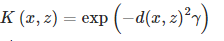

In [18]:
from IPython.display import Image
Image("Image/formula3.png")

**rumus diatas adalah SVM- Gaussian Kernel**

StochasticGradient,SVM1,SVM2

pada fungsi building StochasticGradient memiliki parameter train,label
test,label_test yang akan digunakan pada langkah koding train data
berikutnya model building ini dimulai dengan time series analisis
dan kemudian pendeklarasian model dengan equal fungsi SGDClasifier
dan slanjutnya terdapat Overfitting terjadi karena model yang dibuat terlalu fokus pada training dataset tertentu, hingga tidak bisa melakukan prediksi dengan tepat jika diberikan dataset lain yang serupa. Overfitting biasanya akan menangkap data noise yang seharusnya diabaikan. Overfitting model akan memiliki low loss dan akurasi rendah.
berikutnya terdapat variabel pred untuk prediction dengan equal data model.predic
dengan parameter test
dan kemudian terdapat variabel end dengan time series analisis
variabel confussion mat equal confussion matrix dengan parameter label test,dan pred
fungsi get_confusion_matrix_values2 dengan parameter label test dan pred
berfungsi untuk mendapatkan data dalam bentuk matriks
dan selanjutnya variabel TN1, FP1, FN1, TP1 equal dengan get_confusion_matrix_values2 label_test, pred
selanjutnya terdapat formula denom1=TP1+FP1
formula pada function ini berasal dari 
Formula :
Akurasi = (TP + TN ) / (TP+FP+FN+TN)
Precission = (TP) / (TP+FP)
Specificity = (TN)/ (TN + FP)

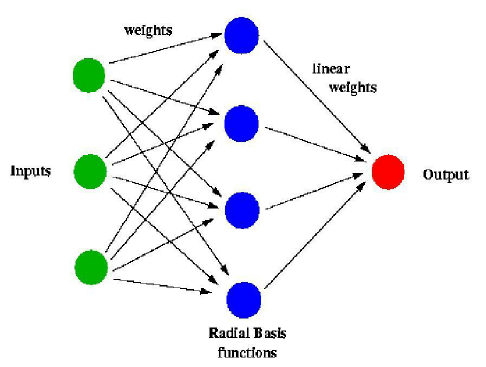

In [20]:
from IPython.display import Image
Image("Image/ChartANN.png")